In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

# x is the array you want to save 


In [2]:
adFolder = 'ADE20K_2016_07_26/images/training/'

In [3]:
class Image():
    
    def __init__(self, path, txt):
        self.path = path
        self.txtFile = txt
    
    def parseTxt(self):
        self.text = pd.read_csv(self.path+'/'+self.txtFile, sep="#", header=None)
    
    def isIn(self, listElem):
        retList = []
        for el in listElem:
            for t in self.text.values:                
                if t[1] == 0 and el in [x.strip() for x in t[3].lower().split(',')]:
                    retList.append(t)
        self.isInList = listElem
        self.isretList = retList
        return retList
    
    def getImageName(self):        
        return self.txtFile.split('_atr.txt')[0]+'.jpg'
    
    def getFullImagePath(self):
        return self.path+'/'+self.getImageName()
    
    def getSegName(self):        
        return self.txtFile.split('_atr.txt')[0]+'_seg.png'
    
    def getFullSegPath(self):
        return self.path+'/'+self.getSegName()
    
    def loadImage(self):
        self.img = load_img(self.getFullImagePath(), grayscale=False)
        self.x_img = img_to_array(self.img)
        return self.x_img
    
    def loadSeg(self):
        self.seg = load_img(self.getFullSegPath(), grayscale=False)
        self.x_seg = img_to_array(self.seg)
        return self.x_seg
        
    def sortPixelMask(self):
        self.unique_pixels = np.vstack({tuple(r) for r in self.x_seg.reshape(-1,3)})
        ind=np.argsort(self.unique_pixels[:,-1])
        self.unique_pixels=self.unique_pixels[ind]
     
        return self.unique_pixels
    
    def getPixelId(self, num):        
        if not all(self.unique_pixels[0] == [0,0,0]):
            return self.unique_pixels[num-1]
        
        return self.unique_pixels[num]
    
    def getPixelAllSelectedId(self):
        allIds = []
        for x in self.isretList:
            allIds.append(self.getPixelId(x[0]))
        return allIds
    
    def generateMask(self):        
        final = np.zeros((self.x_seg.shape[0], self.x_seg.shape[1], 3))
        for x in self.getPixelAllSelectedId():            
            mask = (self.x_seg == x).all(axis=2)
            final[ mask ] = [255,255,255]
        self.masked = final
        return final
    
    def processAll(self):
        if len(self.loadImage().shape) != 3:
            return False
        self.loadSeg()
        self.sortPixelMask()
        self.generateMask()
        return True
        # final = np.ones((self.x_seg.shape[0], self.x_seg.shape[1], 3)) * 255
        # target = np.zeros((self.x_seg.shape[0], self.x_seg.shape[1], 3))
        # for x in self.getPixelAllSelectedId():
        #    final = np.where(self.x_seg == x, final, target)
        #return final
    def save(self, trainPath, maskPath):
        save=cv2.cvtColor(self.x_img, cv2.cv2.COLOR_BGR2RGB)
        cv2.imwrite(trainPath+'/'+self.getImageName(), save) 
        cv2.imwrite(maskPath+'/'+self.getImageName(), self.masked) 
        pass
    
    def deleteSelf(self):
        try:
            del self.text
            del self.img
            del self.x_img
            del self.masked
            del self.seg
            del self.x_seg        
        except:
            pass

In [4]:
import os
allImages = []
def recursive_walk(folder):
    for folderName, subfolders, filenames in os.walk(folder):
        if subfolders:
            for subfolder in subfolders:
                recursive_walk(subfolder)

        for filename in filenames:
            
            if filename.endswith('txt'):
                allImages.append(Image(folderName, filename))

recursive_walk(adFolder)
print("Done!")    

Done!


In [5]:
for im1 in allImages:
    im1.parseTxt()

print("DONE")

DONE


In [6]:
lista = ["waves", "wave", 'waterfall', 'coast', 'tidal river',"water", "river", "sea", "aquarium", "sea water", "river", "river water","sea water ice","sea cliff", 'seagull','seawall','seaside']
    
selectedImages = []

for im1 in allImages:
    if len(im1.isIn(lista))>0:
        selectedImages.append(im1)
print("Done", len(selectedImages))

Done 1707


In [7]:
trainpath = 'dataset/water/train/'
maskpath = 'dataset/water/mask/'

for i in tqdm(range(len(selectedImages))):
    img = selectedImages[i]
    try:
        if (img.processAll()):
            img.save(trainpath, maskpath)
    except:
        pass
    img.deleteSelf()

100%|██████████| 1707/1707 [34:16<00:00,  1.20s/it] 


In [8]:
adFolder = 'ADE20K_2016_07_26/images/validation/'

In [9]:
allImages = []
recursive_walk(adFolder)
print("Done!")    

Done!


In [10]:
for im1 in allImages:
    im1.parseTxt()

print("DONE")

DONE


In [11]:
lista = ["waves", "wave", 'waterfall', 'coast', 'tidal river',"water", "river", "sea", "aquarium", "sea water", "river", "river water","sea water ice","sea cliff", 'seagull','seawall','seaside']
    
selectedImages = []

for im1 in allImages:
    if len(im1.isIn(lista))>0:
        selectedImages.append(im1)
print("Done", len(selectedImages))

Done 159


In [12]:
trainpath = 'dataset/water/validation/train/'
maskpath = 'dataset/water/validation/mask/'

for i in tqdm(range(len(selectedImages))):
    img = selectedImages[i]
    try:
        if (img.processAll()):
            img.save(trainpath, maskpath)
    except:
        pass
    img.deleteSelf()

100%|██████████| 159/159 [02:49<00:00,  1.06s/it]


In [ ]:
img = selectedImages[1393]

In [ ]:
img.text

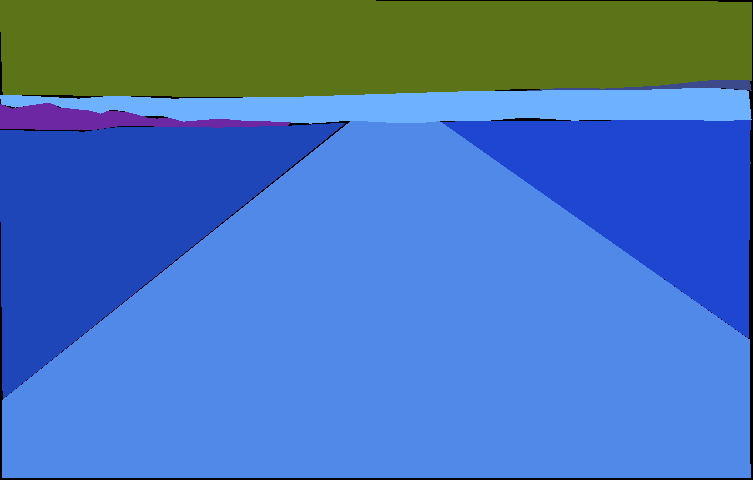

In [752]:
img.seg

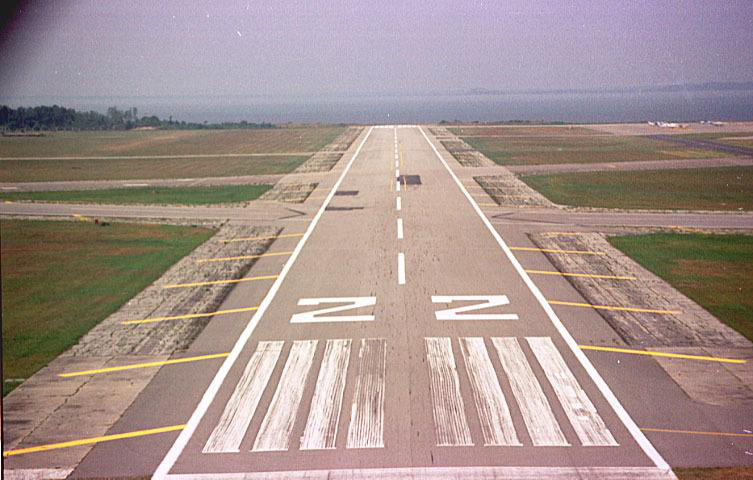

In [753]:
img.img

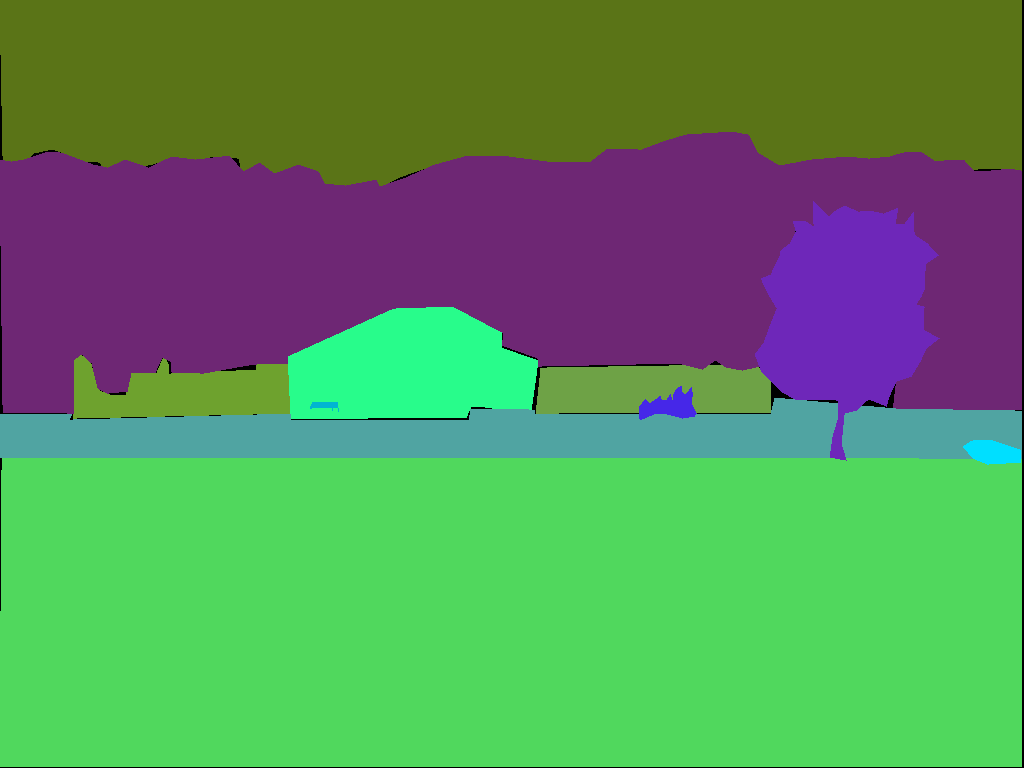

In [560]:
img.seg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


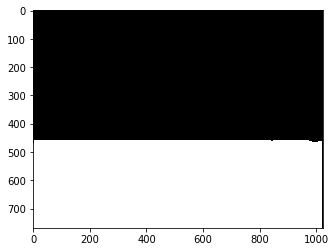

In [561]:
plt.imshow(img.masked)

In [524]:
ret

[array([4, 0, 0, ' water ', ' water ', ' ""'], dtype=object),
 array([5, 0, 0, ' water ', ' water ', ' ""'], dtype=object),
 array([6, 0, 0, ' water ', ' water ', ' ""'], dtype=object),
 array([7, 0, 0, ' water ', ' water ', ' ""'], dtype=object)]

In [525]:
selectedImages[3].loadImage()
selectedImages[3].loadSeg()

In [526]:
selectedImages[3].text

,0,1,2,3,4,5
0,1,0,0,sky,sky,""""""
1,2,0,0,tree,trees,""""""
2,3,0,0,grass,grass,""""""
3,4,0,0,water,water,""""""
4,5,0,0,water,water,""""""
5,6,0,0,water,water,""""""
6,7,0,0,water,water,""""""
7,8,0,0,tree,trees,""""""
8,9,0,0,tree,tree,""""""
9,10,0,0,tree,trees,""""""


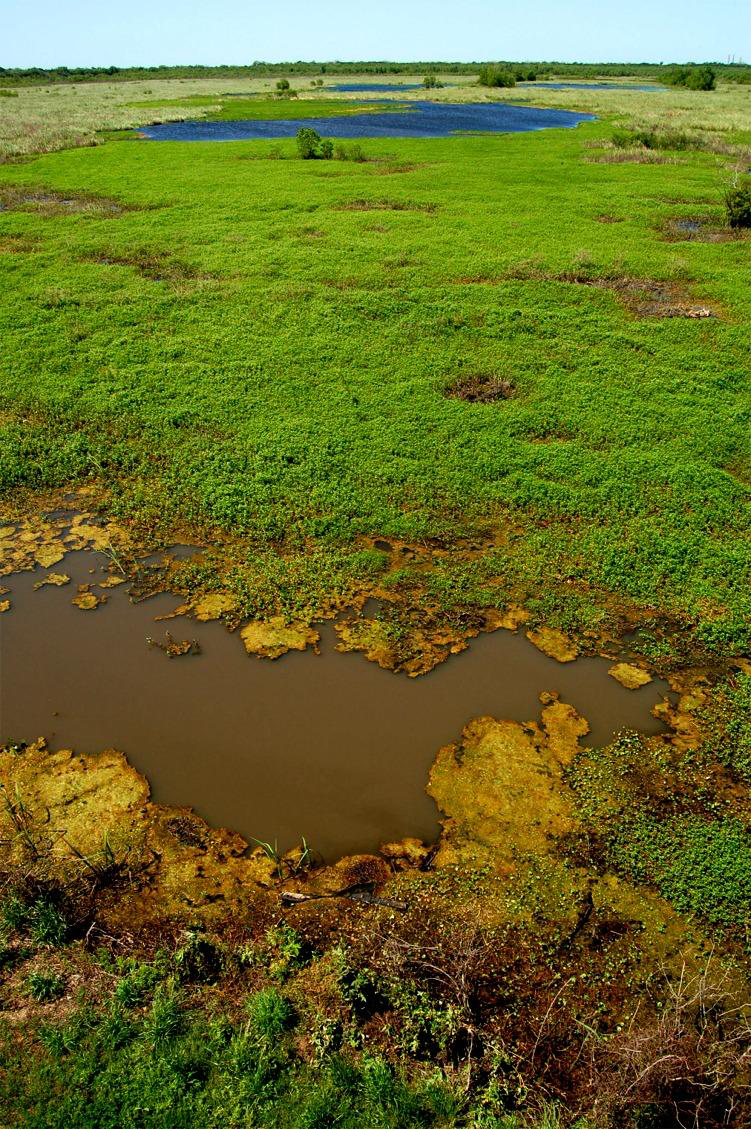

In [527]:
selectedImages[3].img

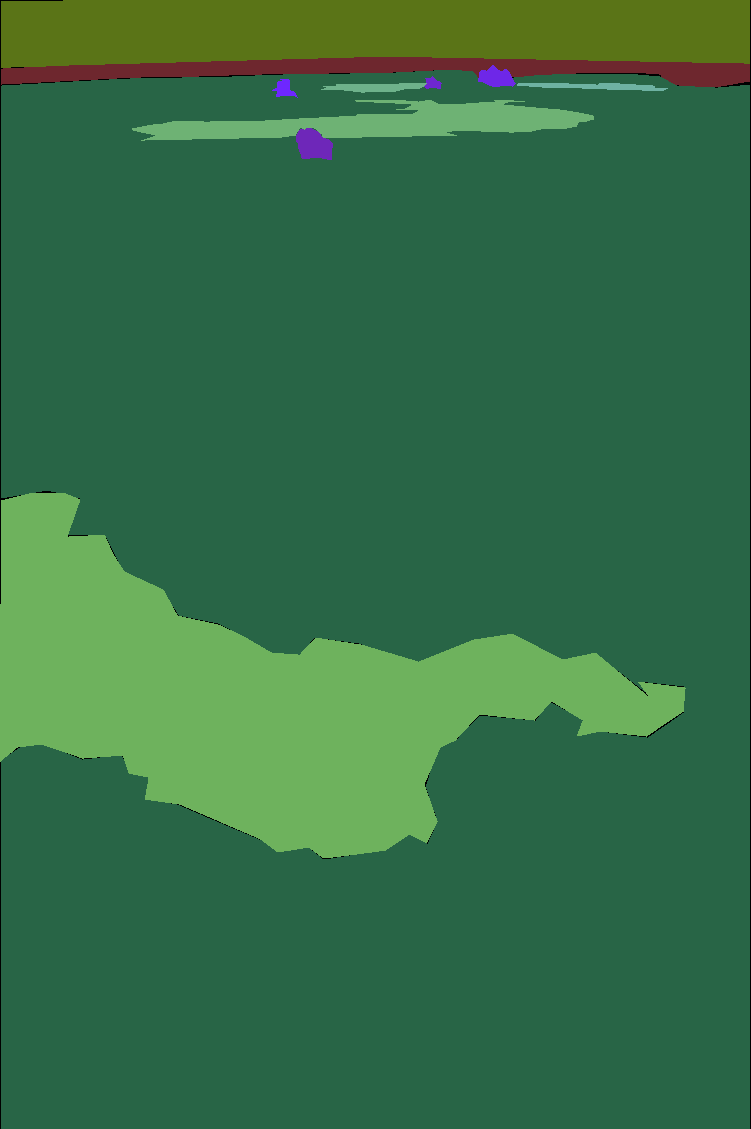

In [528]:
selectedImages[3].seg

In [529]:
selectedImages[3].sortPixelMask()

/home/angel/Desktop/git/beautyImages/jupyters/venv/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[  0.,   0.,   0.],
       [ 90., 116.,  23.],
       [110.,  39.,  46.],
       [ 40., 101.,  70.],
       [110., 178.,  93.],
       [110., 178., 116.],
       [110., 178., 139.],
       [110., 178., 162.],
       [110.,  39., 185.],
       [110.,  39., 209.],
       [110.,  39., 232.],
       [110.,  39., 255.]], dtype=float32)

In [530]:
selectedImages[3].getPixelId(1)

array([ 90., 116.,  23.], dtype=float32)

In [531]:
selectedImages[3].x_seg

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        ...,
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        ...,
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        ...,
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        ...,
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 40., 101.,  70.],
        [ 40., 1

In [532]:
selectedImages[3].isretList

[array([4, 0, 0, ' water ', ' water ', ' ""'], dtype=object),
 array([5, 0, 0, ' water ', ' water ', ' ""'], dtype=object),
 array([6, 0, 0, ' water ', ' water ', ' ""'], dtype=object),
 array([7, 0, 0, ' water ', ' water ', ' ""'], dtype=object)]

In [533]:
selectedImages[3].getPixelAllSelectedId()


[array([110., 178.,  93.], dtype=float32),
 array([110., 178., 116.], dtype=float32),
 array([110., 178., 139.], dtype=float32),
 array([110., 178., 162.], dtype=float32)]

In [534]:

final = np.zeros((selectedImages[3].x_seg.shape[0], selectedImages[3].x_seg.shape[1], 3))
for x in selectedImages[3].getPixelAllSelectedId():            
    mask = (selectedImages[3].x_seg == x).all(axis=2)
    print(np.sum(mask))
    final[ mask ] = [255,255,255]



107844
9851
686
731


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


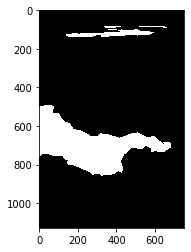

In [535]:
plt.imshow(final)

In [429]:
np.sum(mask)

666762

In [430]:
final[ mask ] = [255,255,255]

In [416]:
selectedImages[3].x_seg.shape

(1129, 751, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


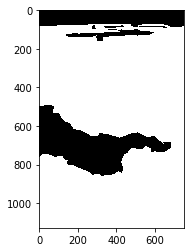

In [357]:
selectedImages[3].generateMask()

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [368]:
selectedImages[3].x_seg

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        ...,
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        ...,
        [ 90., 116.,  23.],
        [ 90., 116.,  23.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        ...,
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        ...,
        [ 40., 101.,  70.],
        [ 40., 101.,  70.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 40., 101.,  70.],
        [ 40., 1

In [369]:
selectedImages[3].x_seg.shape

(1129, 751, 3)

In [382]:
selectedImages[3].getPixelId(2)

array([90., 39., 46.], dtype=float32)

In [402]:
selectedImages[3].x_seg[50,1] == [ 80., 116.,  23.]

array([False,  True,  True])

In [394]:
# print(selectedImages[3].x_seg==[90., 39., 46.])

# np.where(selectedImages[3].x_seg==selectedImages[3].getPixelId(2),[1,1,1],[0,0,0])


array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [False, False, False]],

       [[False, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [False, False, False]],

       [[False, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

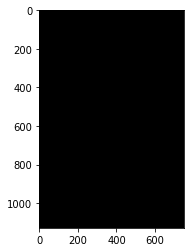

In [362]:
import matplotlib.pyplot as plt
plt.imshow(selectedImages[3].generateMask())

In [358]:

def getPixelId(self, num):
    return self.unique_pixels[num]

def getPixelAllSelectedId(self):
    allIds = []
    for x in self.isInList:
        allIds = getPixelId(self, x[0])
    print(allIds)
    return allIds

def generateMask(self):
    final = np.ones((self.x_seg.shape[0], self.x_seg.shape[1], 3)) * 255
    target = np.zeros((self.x_seg.shape[0], self.x_seg.shape[1], 3))
    for x in getPixelAllSelectedId(self):
        final = np.where(self.x_seg == x, final, target)
    return final

In [331]:
selectedImages[3].getPixelId(1)

array([40., 39., 23.], dtype=float32)

In [333]:
allIds = []
for x in selectedImages[3].isInList:
    print(x[0])
    allIds = getPixelId(selectedImages[3], x[0])
print(allIds)
return allIds

w


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [264]:
len(np.unique(selectedImages[3].x_seg[:,:,2]))

12

In [265]:
np.unique(selectedImages[3].x_seg[:,:,2])

array([  0.,  23.,  46.,  70.,  93., 116., 139., 162., 185., 209., 232.,
       255.], dtype=float32)

/home/angel/Desktop/git/beautyImages/jupyters/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [249]:
unique_pixels.shape

(12, 3)

array([[  0.,   0.,   0.],
       [ 40.,  39.,  23.],
       [ 90.,  39.,  46.],
       [110.,  39.,  70.],
       [110.,  39.,  93.],
       [110.,  39., 116.],
       [110., 101., 139.],
       [110., 116., 162.],
       [110., 178., 185.],
       [110., 178., 209.],
       [110., 178., 232.],
       [110., 178., 255.]], dtype=float32)

In [173]:
import matplotlib.pyplot as plt

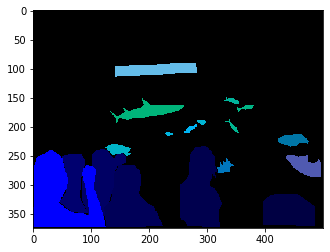

In [191]:
tt = np.where(x_seg == [110., 162.,  11.],[0,0,0] , x_seg)
tt = np.where(tt == [10., 191.,  22.], [0,0,0], tt)
tt = np.where(tt == [ 120.,  44.,  33.], [0,0,0], tt)
tt = np.where(tt == [ 30., 139.,  44.], [0,0,0], tt)
tt = np.where(tt == [ 70.,  39.,  55.], [0,0,0], tt)

plt.imshow(tt/255)

In [121]:
tt = x_seg[0:5,:,:]
tt.shape


(5, 500, 3)

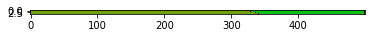

In [122]:
plt.imshow(tt/255)